In [ ]:
#Playing around w/ K-NN Classification on built-in R datasets

.pred_class
<fct>
4


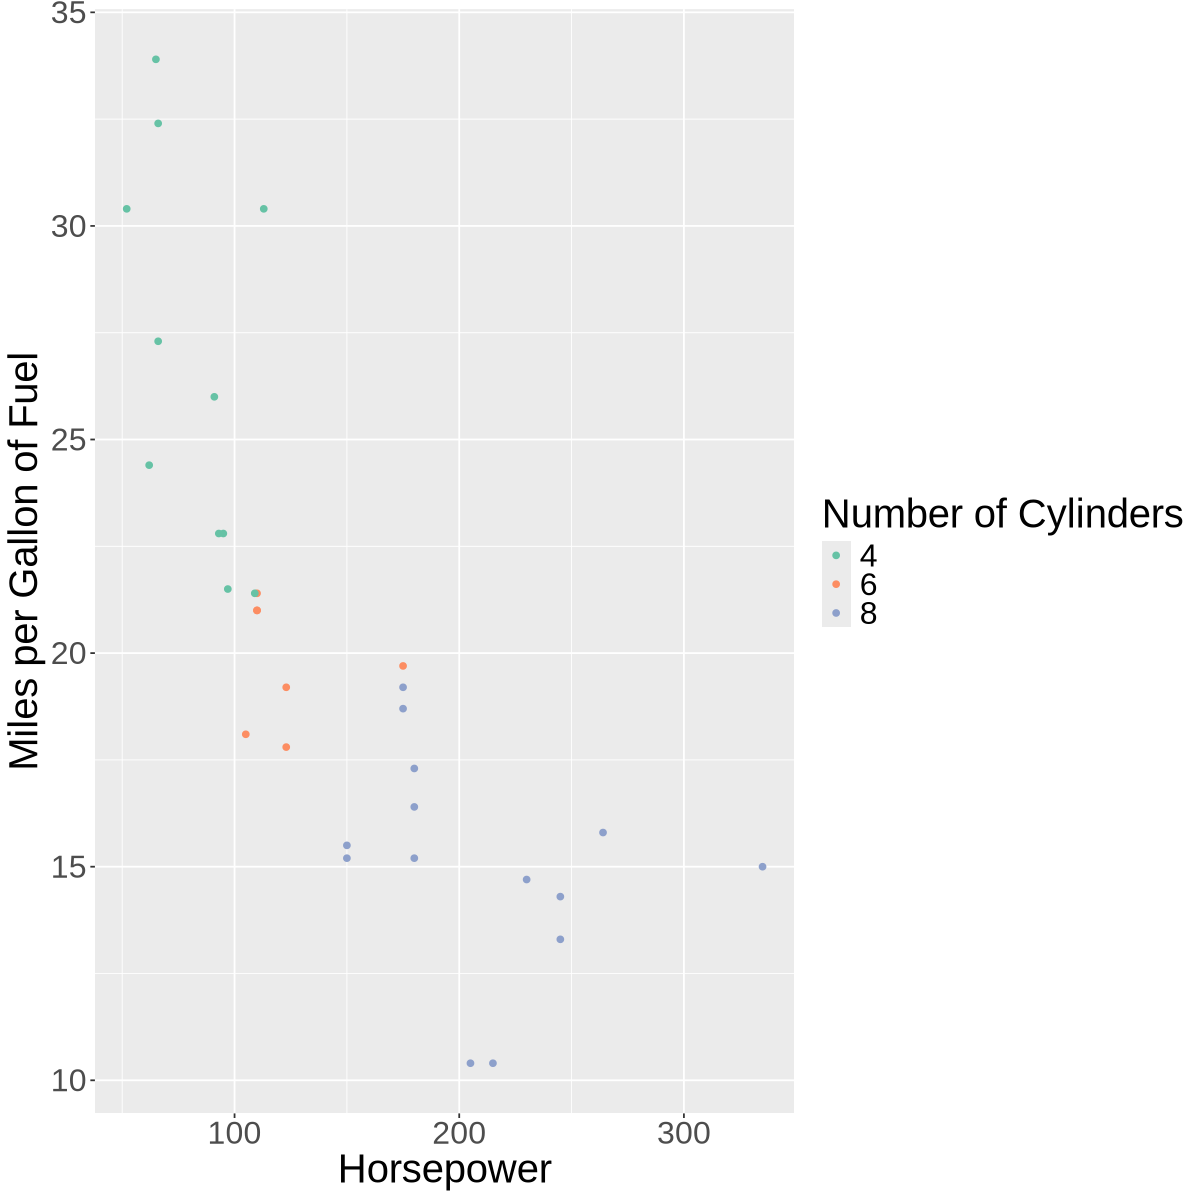

In [19]:
library(tidyverse)
library(tidymodels)


#classifying cars in the mtcars dataset

#set seed
set.seed(9999) 

data(mtcars)
mtcars_2 <- mtcars |>
            mutate(cyl = as.factor(cyl))


options(repr.plot.width = 10, repr.plot.height = 10)
#graph to look for relationship across class
cars_graph <- mtcars_2 |>
                ggplot(aes(x = hp, y = mpg, color = cyl)) +
                geom_point() +
                labs(x = "Horsepower", 
                     y = "Miles per Gallon of Fuel", 
                     color = "Number of Cylinders") +
                    theme(text = element_text(size = 24)) +
                 scale_color_brewer(palette = "Set2") 

cars_graph


#train model
knn_spec_car <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
                set_engine("kknn") |>
                set_mode("classification")

knn_recipe_car <- recipe(cyl ~ hp + mpg, data = mtcars_2) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors())

knn_fit_car <- workflow() |> 
            add_recipe(knn_recipe_car) |>
            add_model(knn_spec_car) |>
            fit(data = mtcars_2)


#predicting the number of cylinders in a car with 150 horsepower and an MPG of 25
unknown_car <- tibble(hp = 150, mpg = 25)
predict(knn_fit_car, unknown_car)

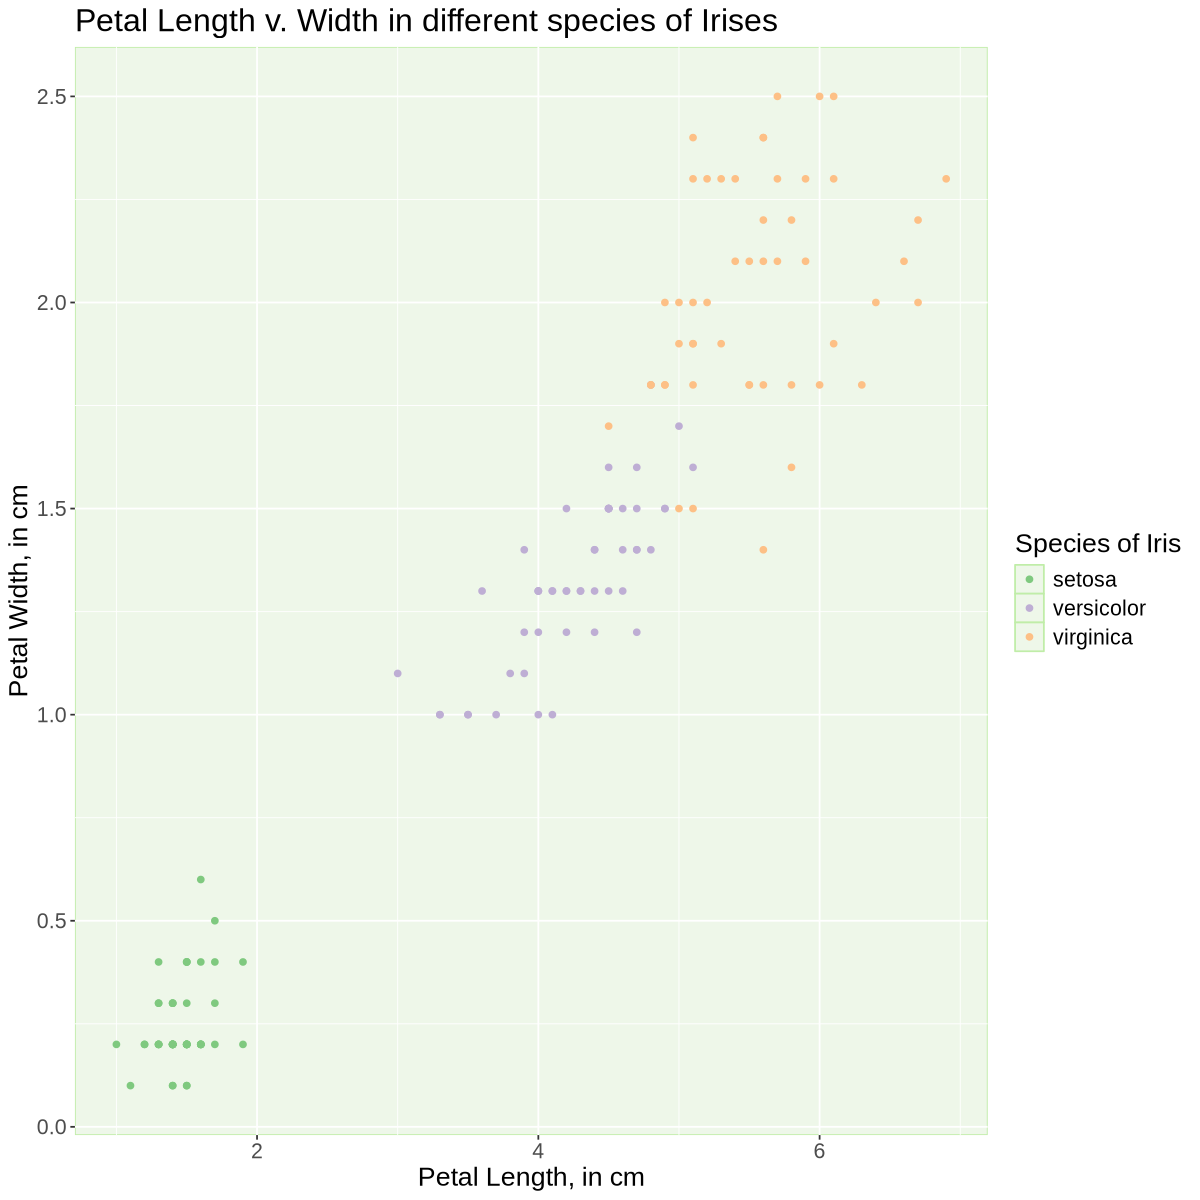

.pred_class
<fct>
virginica


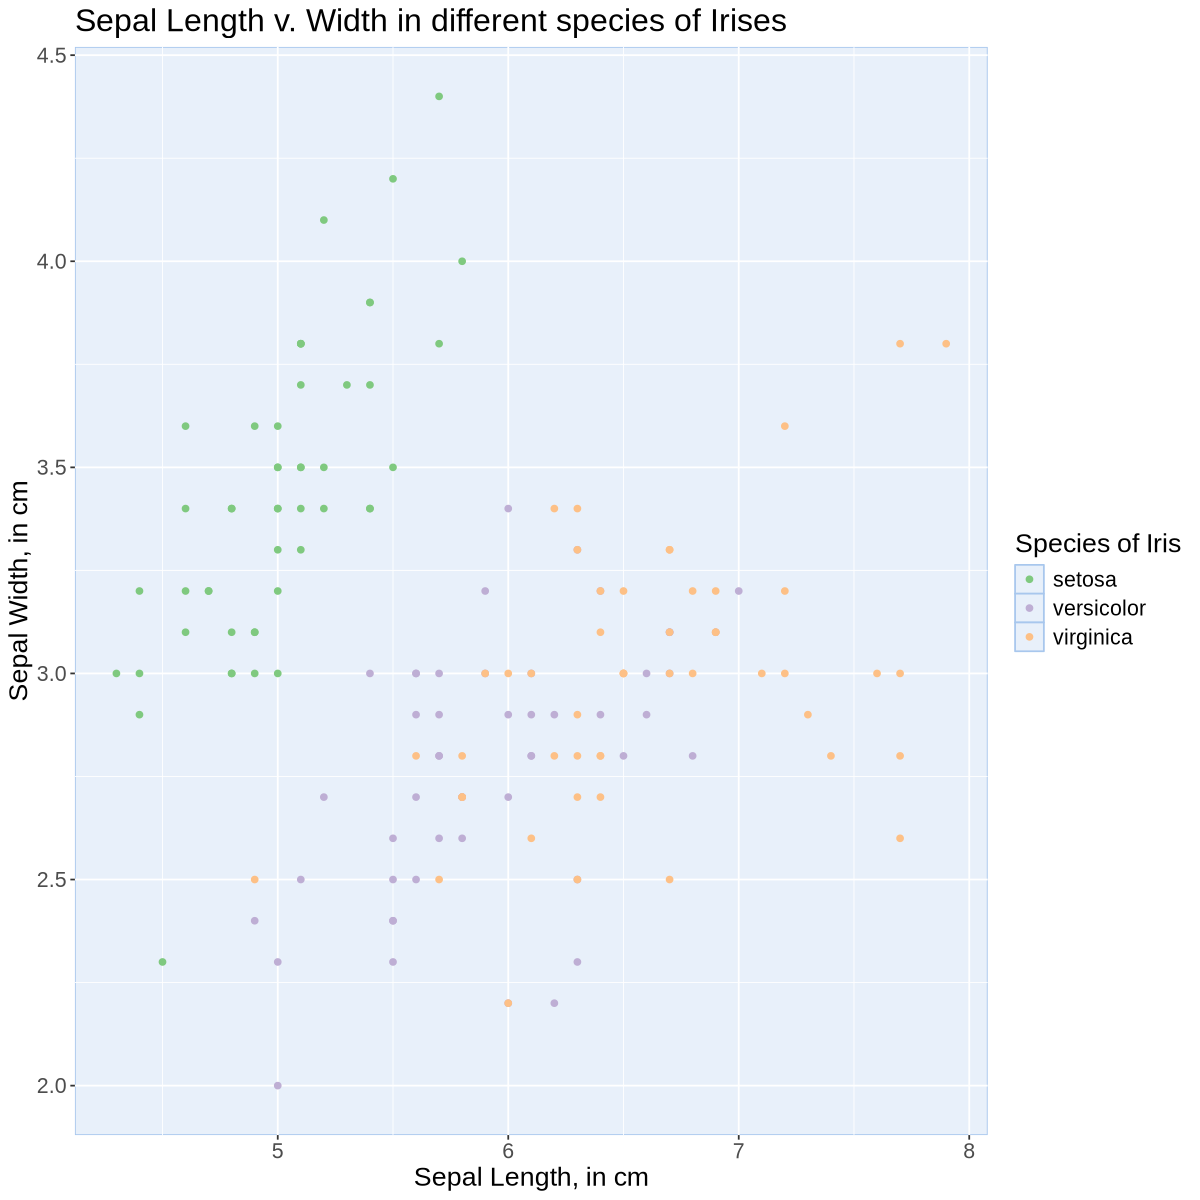

In [70]:
#classifying irises based on their measurements

data(iris)

#set seed
set.seed(9999) 

iris_petal_plot <- iris |>
            ggplot(aes(x = Petal.Length, y = Petal.Width, color = Species)) +
            geom_point() +
            labs(x = "Petal Length, in cm", y = "Petal Width, in cm", color = "Species of Iris") +
            ggtitle("Petal Length v. Width in different species of Irises") +
            theme(text = element_text(size = 16)) +
            scale_color_brewer(palette = "Accent") +
         theme(panel.background = element_rect(fill = "#eef7e9", colour = "#c0eda8"))

iris_petal_plot

iris_sepal_plot <- iris |>
            ggplot(aes(x = Sepal.Length, y = Sepal.Width, color = Species)) +
            geom_point() +
            labs(x = "Sepal Length, in cm", y = "Sepal Width, in cm", color = "Species of Iris") +
            ggtitle("Sepal Length v. Width in different species of Irises") +
            theme(text = element_text(size = 16)) +
            scale_color_brewer(palette = "Accent") +
         theme(panel.background = element_rect(fill = "#e8f0fa", colour = "#a8c7ed"))


iris_sepal_plot

#The plots show clearer class distinction in petal measuremets and their trend than in sepal measurements, so I trained my model only on petals

knn_spec_iris <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
                set_engine("kknn") |>
                set_mode("classification")


knn_recipe_iris <- recipe(Species ~ Petal.Width + Petal.Length, data = iris) |>
                    step_center(all_predictors()) |>
                    step_scale(all_predictors())


knn_fit_iris <- workflow() |>
                add_model(knn_spec_iris) |>
                add_recipe(knn_recipe_iris) |>
                fit(data = iris)


new_iris <- tibble(Petal.Width = 4,
                  Petal.Length = 1.5)

predict(knn_fit_iris, new_iris)